In [1]:
import torch
import random
from torch import nn, optim
import math
from IPython import display

from res.plot_lib import plot_data, plot_model, set_default

set_default()

In [2]:
# constants
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
LEARNING_RATE = 1e-3
LAMBDA_L2 = 1e-5
EPOCH = 1000

### Create the synthetic data

In [3]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units


In [4]:
X = torch.zeros(N * C, D).to(DEVICE)
y = torch.zeros(N * C, dtype=torch.long).to(DEVICE)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


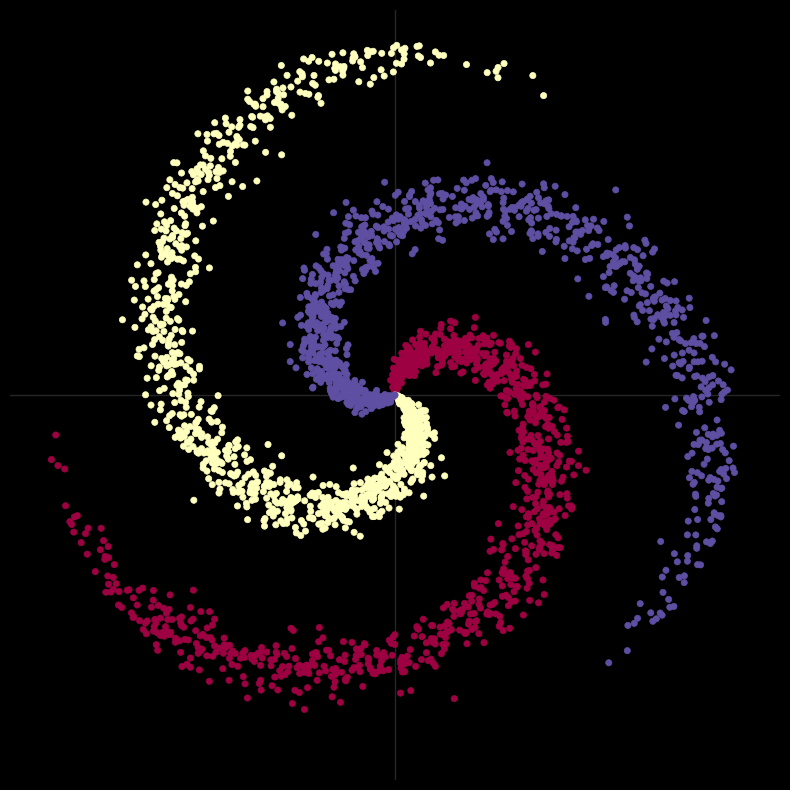

In [5]:
plot_data(X, y)

### Linear Model

In [6]:
# 1. define model
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

model.to(DEVICE)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)

In [7]:
# 2. objective function / loss function
loss_fn = nn.CrossEntropyLoss()

In [8]:
# 3. optimizer / learning alg
opt = optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE,
    weight_decay=LAMBDA_L2
)

In [10]:
for t in range(EPOCH):
    # forward prop
    y_pred = model(X)
    
    loss = loss_fn(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    
    print(f"[EPOCH] : {t}/{EPOCH} -- Loss: {loss.item()}, Acc: {acc}")
    # display.clear_output(wait=True)
    
    # zero gradient
    opt.zero_grad()
    
    # backprop
    loss.backward() # gradient computation
    opt.step() # parameter update

[EPOCH] : 999/1000 -- Loss: 0.7752285003662109, Acc: 0.5066666603088379


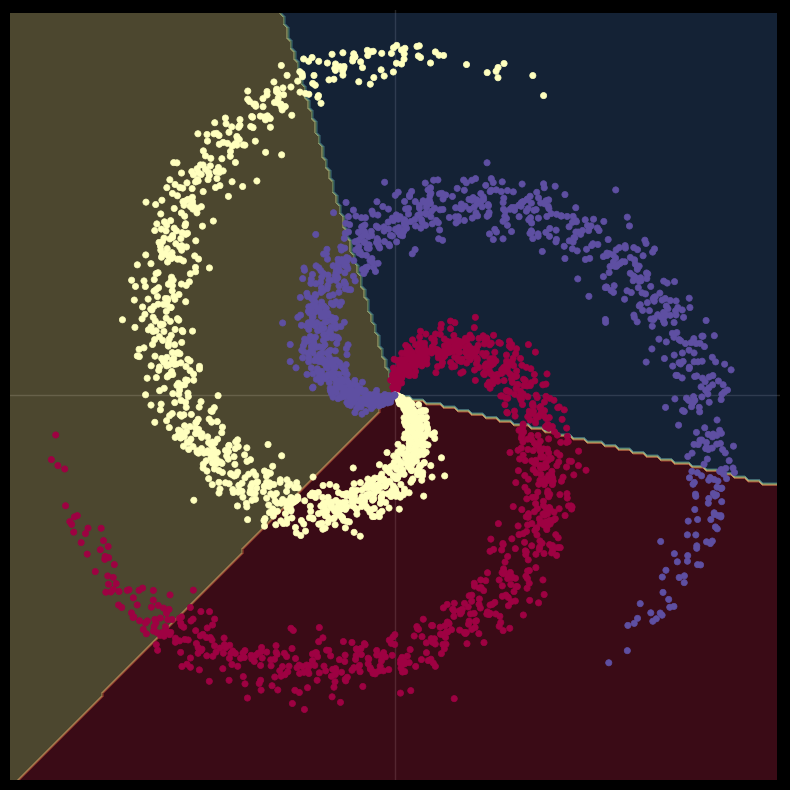

In [11]:
plot_model(X, y, model)

### Non-Linear Model

In [12]:
# 1. define model
model_nn = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    
    nn.Linear(H, H),
    nn.ReLU(),
    
    nn.Linear(H, C)
)

model_nn.to(DEVICE)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=3, bias=True)
)

In [13]:
loss_nn = nn.CrossEntropyLoss()

In [14]:
# 3. optimizer / learning alg
opt_nn = optim.Adam(
    model_nn.parameters(),
    lr=LEARNING_RATE,
    weight_decay=LAMBDA_L2
)

In [16]:
for t in range(EPOCH):
    # forward prop
    y_pred = model_nn(X)
    
    loss = loss_nn(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    
    print(f"[EPOCH] : {t}/{EPOCH} -- Loss: {loss.item()}, Acc: {acc}")
    # display.clear_output(wait=True)
    
    # zero gradient
    opt_nn.zero_grad()
    
    # backprop
    loss.backward() # gradient computation
    opt_nn.step() # parameter update

[EPOCH] : 0/1000 -- Loss: 0.008335665799677372, Acc: 0.9993333220481873
[EPOCH] : 1/1000 -- Loss: 0.008327385410666466, Acc: 0.9993333220481873
[EPOCH] : 2/1000 -- Loss: 0.008319134823977947, Acc: 0.9993333220481873
[EPOCH] : 3/1000 -- Loss: 0.00831091683357954, Acc: 0.9993333220481873
[EPOCH] : 4/1000 -- Loss: 0.008302715606987476, Acc: 0.9993333220481873
[EPOCH] : 5/1000 -- Loss: 0.008294554427266121, Acc: 0.9993333220481873
[EPOCH] : 6/1000 -- Loss: 0.008286437019705772, Acc: 0.9993333220481873
[EPOCH] : 7/1000 -- Loss: 0.00827834289520979, Acc: 0.9993333220481873
[EPOCH] : 8/1000 -- Loss: 0.008270284160971642, Acc: 0.9993333220481873
[EPOCH] : 9/1000 -- Loss: 0.008262242190539837, Acc: 0.9993333220481873
[EPOCH] : 10/1000 -- Loss: 0.008254202082753181, Acc: 0.9993333220481873
[EPOCH] : 11/1000 -- Loss: 0.008246204815804958, Acc: 0.9993333220481873
[EPOCH] : 12/1000 -- Loss: 0.008238231763243675, Acc: 0.9993333220481873
[EPOCH] : 13/1000 -- Loss: 0.008230316452682018, Acc: 0.9993333

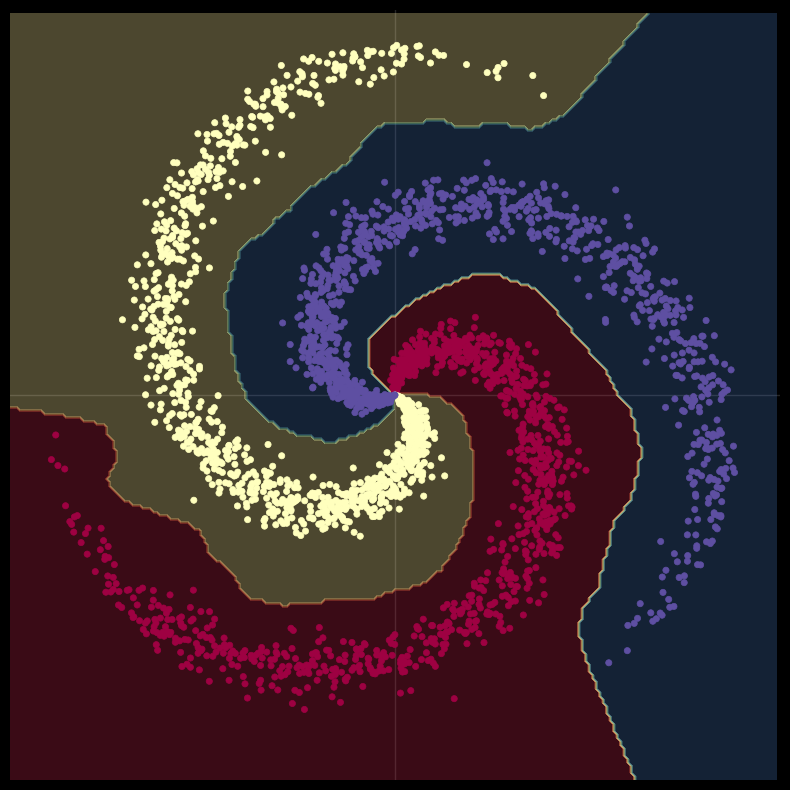

In [17]:
plot_model(X, y, model_nn)